## Problem Statement :- 

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper.
The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?
and also predict the sale for future data

In [1]:

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as st
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split


## Loading The Dataset :

In [2]:
df=pd.read_csv("C:\\Users\\md kaif\\Downloads\\data sets-20221130T050826Z-001\\data sets\\Advertising.csv",index_col=[0])

In [3]:
## Viewing The Top 5 Columns

In [4]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
## Checking Shape


In [6]:
df.shape

(200, 4)

In [7]:
## Checking Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
## Checking The MIssing Values

In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
import missingno as msno

In [12]:
##pip install missingno

<AxesSubplot: >

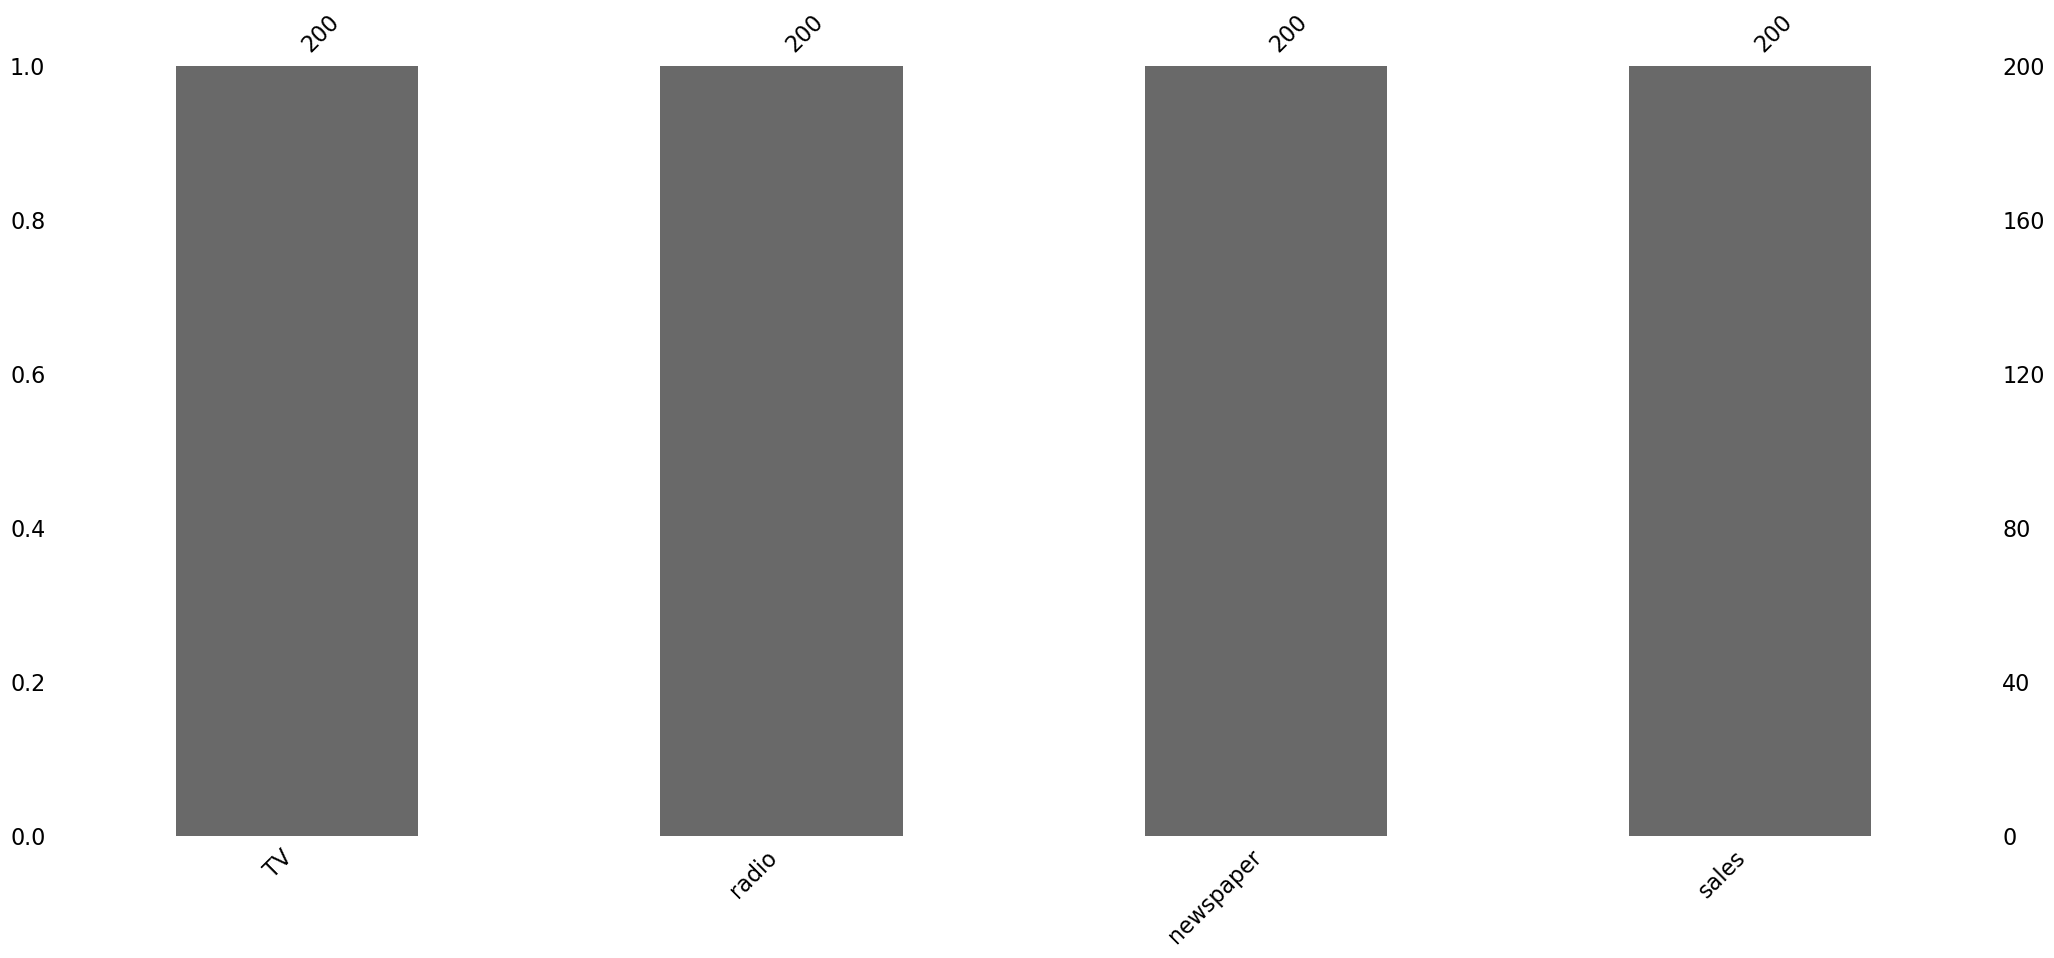

In [13]:
msno.bar(df)

In [14]:
## Checking Linearity

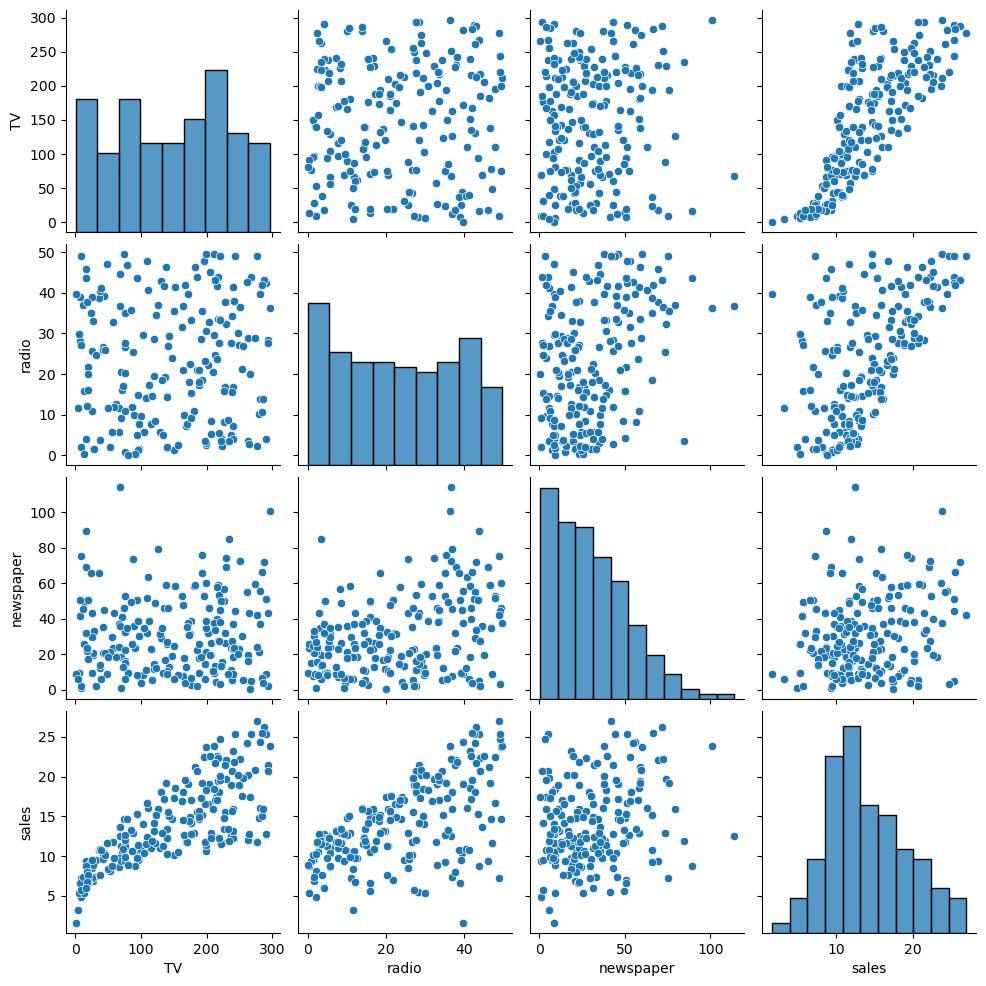

In [15]:
sns.pairplot(df)

## From This Output We Can Say That There Is sort Of Linear Relation Between TV And Sales
### And There Is Not Much Linearity Found In Radio and newspaper With Sales

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot: >

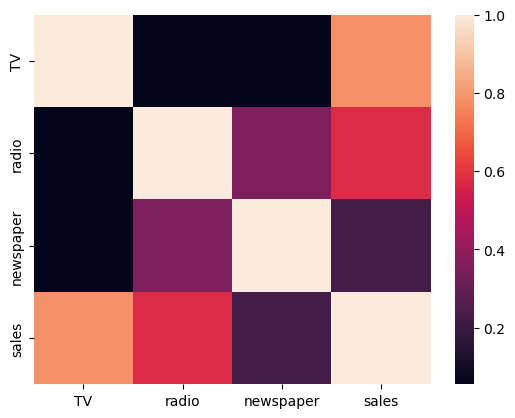

In [17]:
sns.heatmap(df.corr())

In [18]:
## Eda

C:\Users\md kaif\AppData\Local\Temp\ipykernel_13512\2187260780.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\md kaif\AppData\Local\Temp\ipykernel_13512\2187260780.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\md kaif\AppData\Local\Temp\ipykernel_13512\

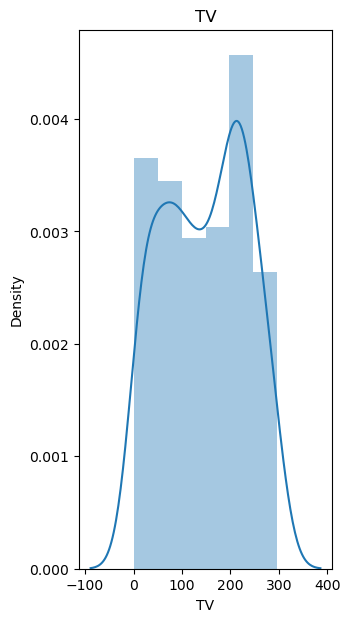

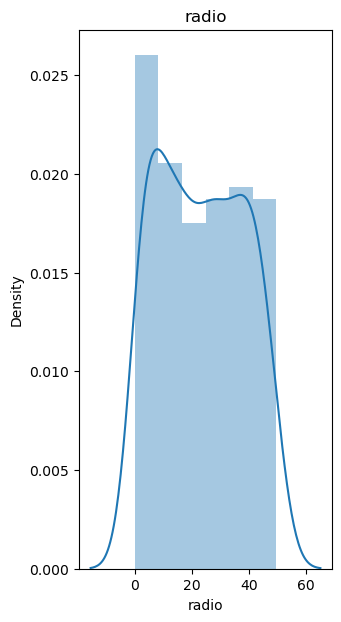

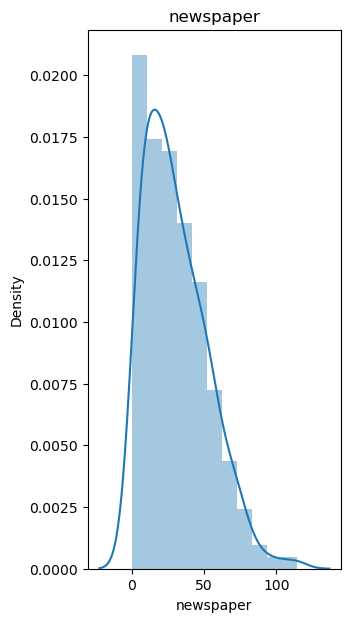

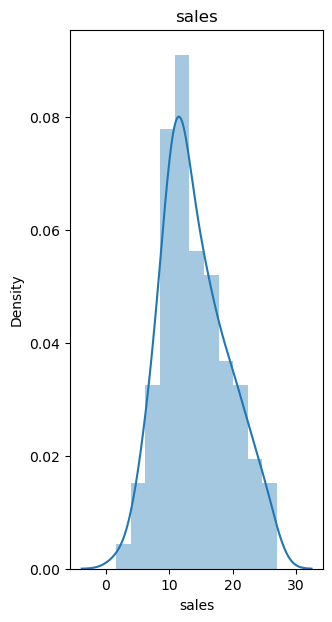

In [19]:
pos=1
for i in df.columns:
    plt.figure(figsize=(15,7))
    plt.subplot(1,4,pos)
    sns.distplot(df[i])
    plt.title(i)
    pos+=1
    

In [20]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

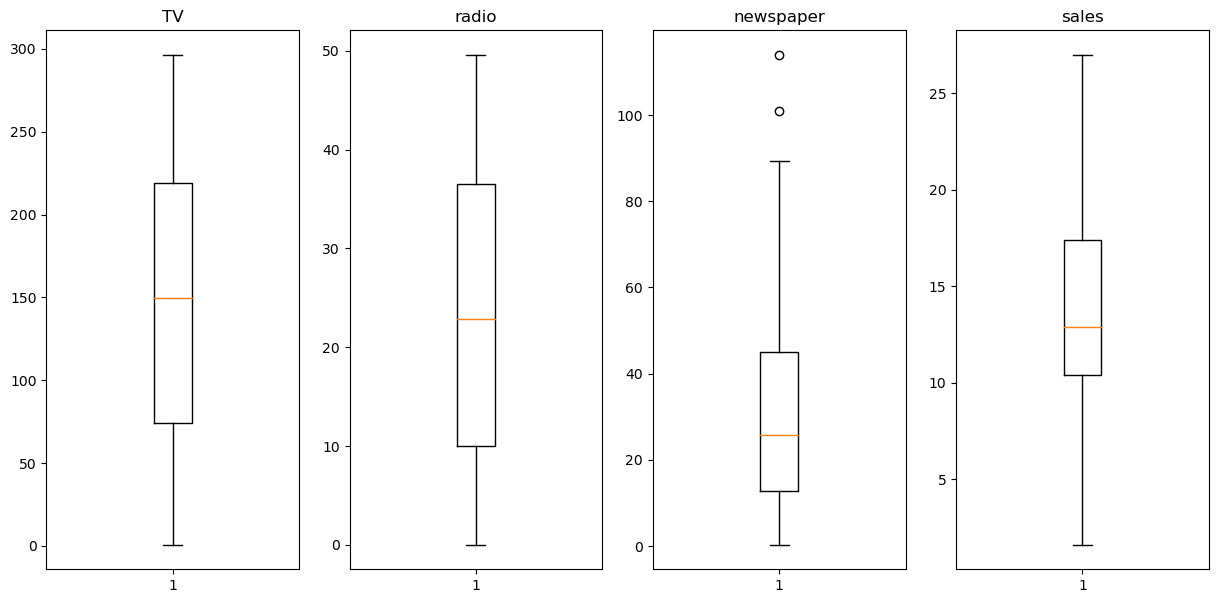

In [21]:
pos=1
plt.figure(figsize=(15,7))
for i in df.columns:
    plt.subplot(1,4,pos)
    plt.boxplot(df[i])
    plt.title(i)
    pos=pos+1

In [22]:
## Segregate X And Y

In [23]:
x=df.drop(columns=["sales"])   ## independent features
y=df["sales"]  ### Target

In [24]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [25]:
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [26]:
## Checking MultiCollinearity == V.I.F
vif = pd.DataFrame()  ##creating blank dataframe 
#vif
variables  = x_scaled
#variables.shape
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
#vif["VIF"]
vif["features"]=x.columns
#vif["features"]
vif


,VIF,features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


## From This Vif Data We Can Say That There Is No Multicollinearity In The Data 

In [27]:
## Splitting The Data In Train And Test

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

In [29]:
x_train.shape

(160, 3)

In [30]:
x_test.shape

(40, 3)

In [31]:
y_train.shape

(160,)

## Training The Model

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
lr.coef_

array([4.01161205, 2.64417846, 0.05618258])

In [35]:
lr.intercept_

14.02854796400448

In [36]:
## Evaluate My Model

In [37]:
y_pred=lr.predict(x_test)

In [38]:
r2_score(y_test,y_pred)

0.8927605914615385

In [39]:
#y=b1*x1+b2*x2+b3*x3+b0

In [40]:
#y=4.01*tv+2.64*radio+0.05*newspaper

In [41]:
#the Amount Invest On Tv Would Be More Effective 
#To Increase The Sale: The Sale Gets Increased 4 Times When The Amount Is Spent On The Tv.

In [42]:
y=4.01*100
x=2.64*50
d=0.05*40
sale=y+x+d+round(lr.intercept_)
print(int(sale),"Lakhs")

549.0 Lakhs
